In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

/Users/berling/new_project/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
import tensorflow_datasets as tfds

/Users/berling/new_project/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
data = tfds.load('fashion_mnist', split ='train')

2024-11-02 15:32:37.568130: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:  25%|██▌       | 1/4 [00:00<00:01,  2.40 url/s]

Dl Completed...:  50%|█████     | 2/4 [00:00<00:00,  3.89 url/s]

Dl Completed...:  75%|███████▌  | 3/4 [00:01<00:00,  1.45 url/s]

Dl Completed...: 100%|██████████| 4/4 [00:04<00:00,  1.30s/ url]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]2024-11-02 15:32:44.726924: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-11-02 15:32:44.726965: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-11-02 15:32:44.726972: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-11-02 15:32:44.727014: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-02 15:32:44.727036: I tensorflow/core/common_runtime/pluggable_device/pluggable_devic

Dataset fashion_mnist downloaded and prepared to /Users/berling/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
data.as_numpy_iterator().next()

In [6]:
import numpy as np

In [7]:
data_iterator = data.as_numpy_iterator()

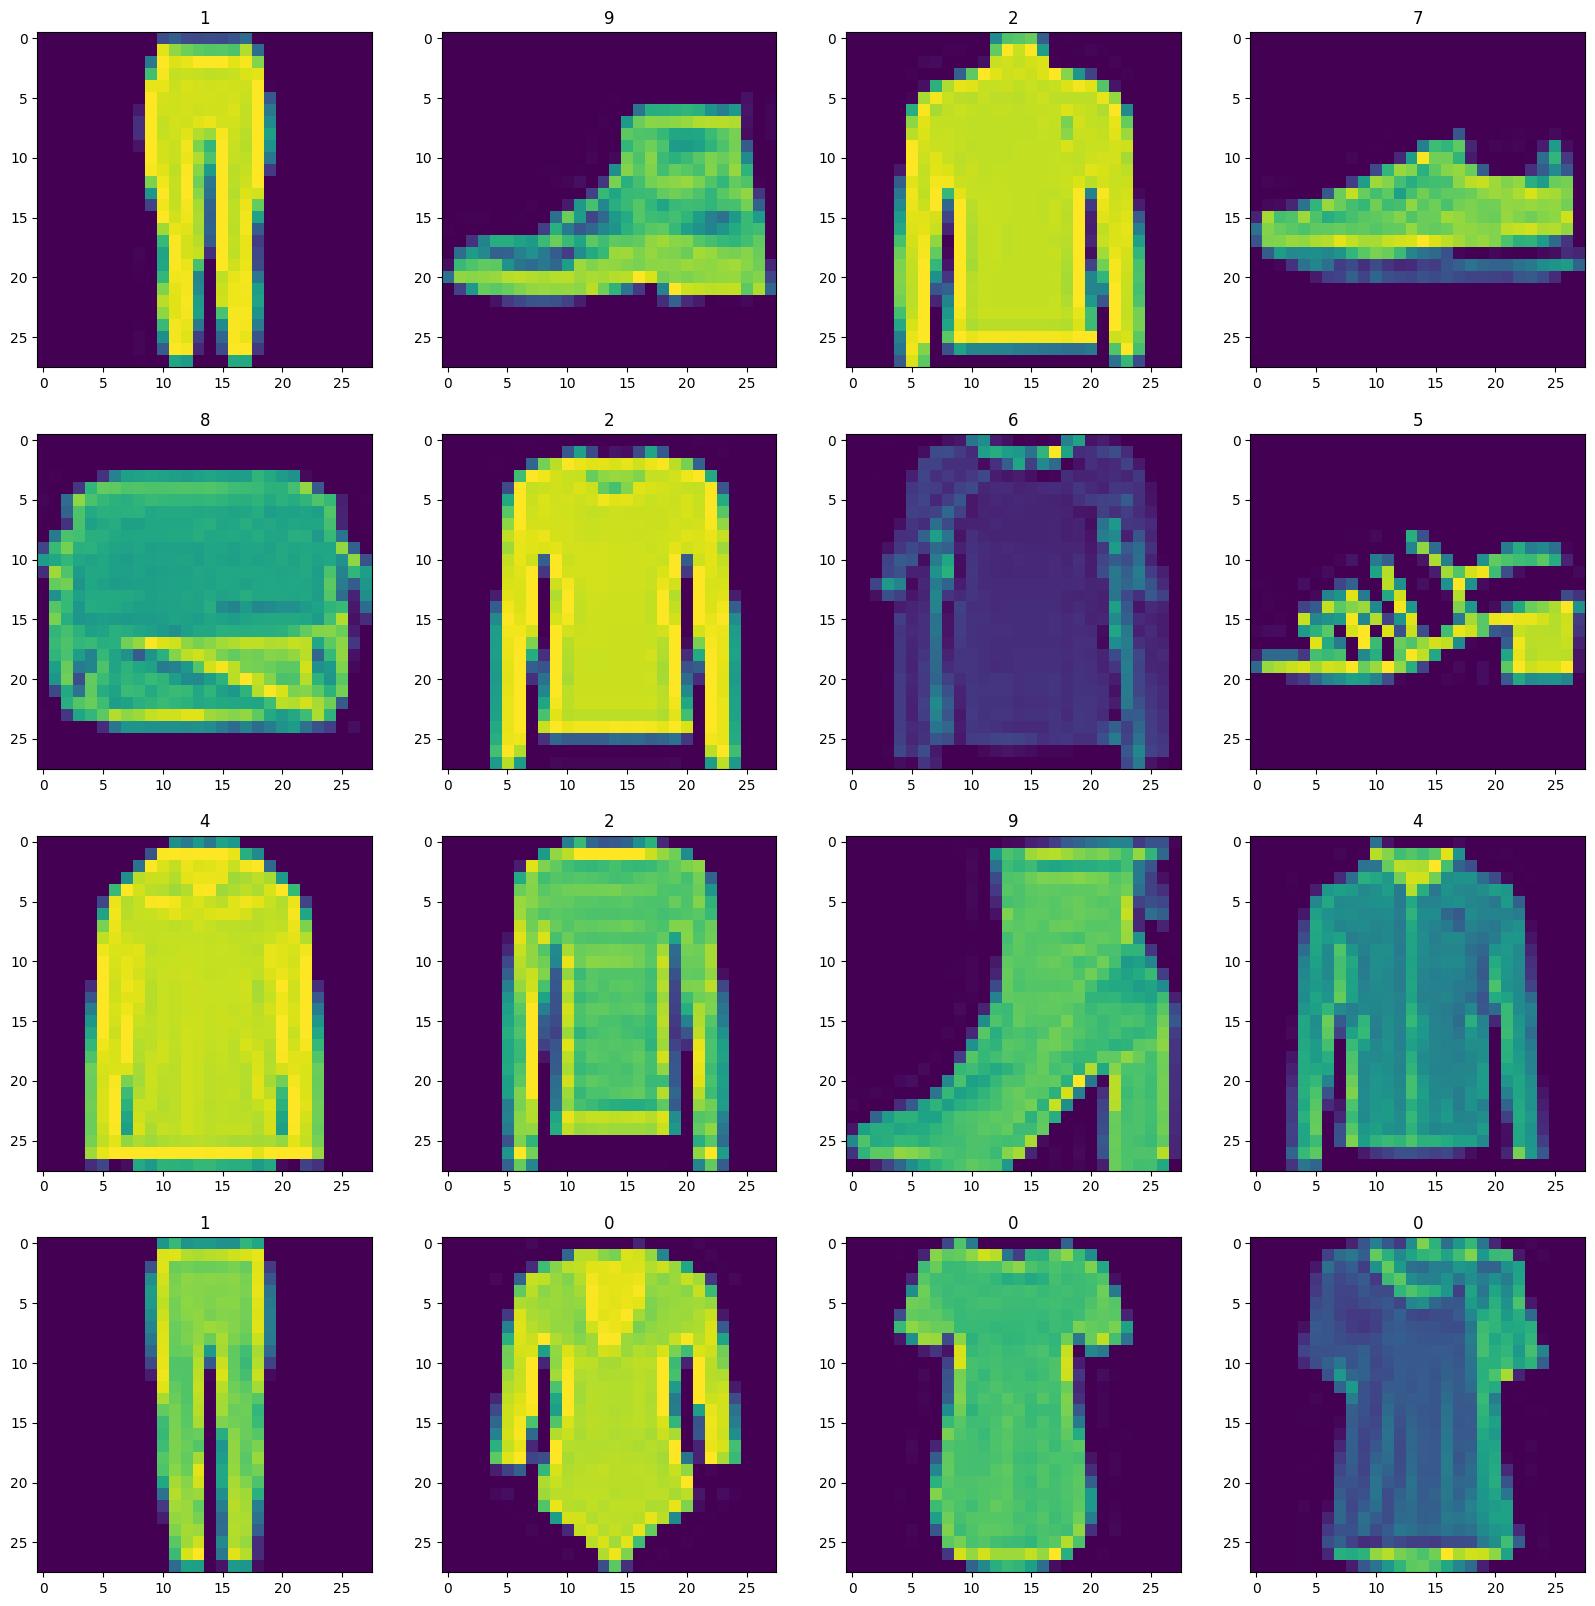

In [10]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (20,20))
for idx_col in range(4):
    for idx_row in range(4):
        batch = data_iterator.next()
        ax[idx_row, idx_col].imshow(np.squeeze(batch['image']))
        ax[idx_row, idx_col].title.set_text(batch['label'])

In [13]:
def scale_images(ds):
    image = ds['image']
    return image / 255

In [14]:
scaled_data = data.map(scale_images)
cached_data = scaled_data.cache()
shuffled_data = cached_data.shuffle(61000) #buffer size
batched_data = shuffled_data.batch(128)
prefetched_data = batched_data.prefetch(64)

In [17]:
prefetched_data.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [48]:
def build_generator():
    
    model = Sequential()
    
    #Takes in a random set of values and reshapes it to 7 x 7 x 128
    #Beginnings of a generated image
    model.add(Dense(7 * 7 * 128, input_dim = 128))# linear activation
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    
    #UpSampling block 1
    model.add(UpSampling2D())
    model.add(Conv2D(128,5, padding = 'same'))
    model.add(LeakyReLU(0.2))
    
    #UpSampling block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding = 'same'))
    model.add(LeakyReLU(0.2))
    
    #Convolutional block 1
    model.add(Conv2D(128, 4, padding = 'same'))
    model.add(LeakyReLU(0.2))
    
    #Convolutional block 2
    model.add(Conv2D(128, 4, padding = 'same'))
    model.add(LeakyReLU(0.2))
    
    #Conv layer to get one channel
    model.add(Conv2D(1, 4, padding = 'same', activation = 'sigmoid'))   
    
    return model

In [51]:
# build_generator().summary()

In [75]:
generator = build_generator()

In [56]:
new_images = gnerator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 40ms/step


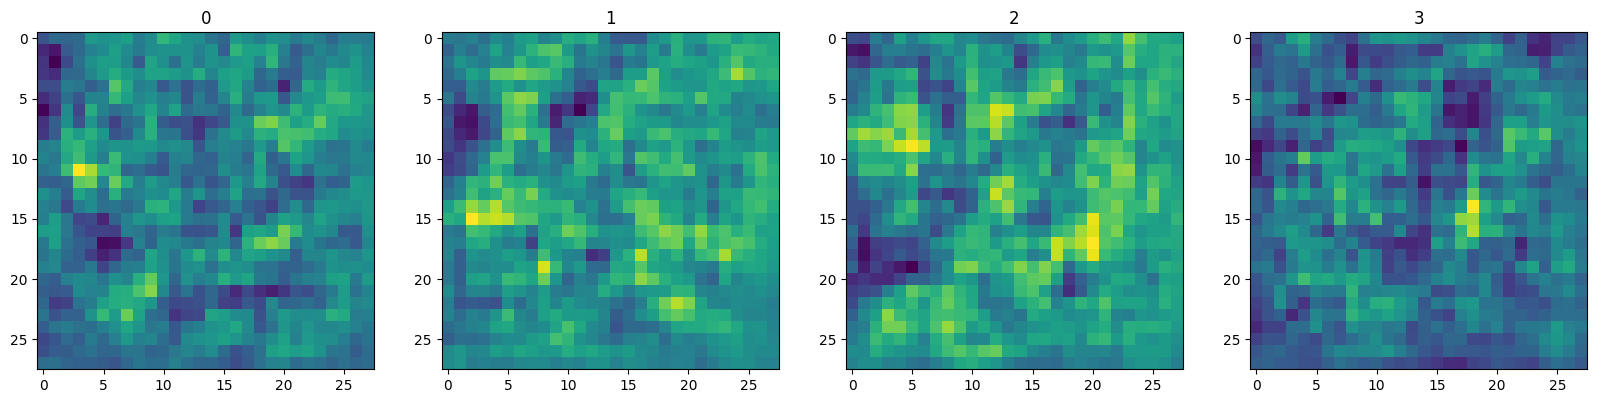

In [57]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))

for idx, new_image in enumerate(new_images):
    ax[idx].imshow(np.squeeze(new_image))
    ax[idx].title.set_text(idx)

In [64]:
def build_discriminator():
    model = Sequential()
    
    #first Conv block
    model.add(Conv2D(32, 5, input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    #second Conv block
    model.add(Conv2D(64, 5, ))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    #third Conv block
    model.add(Conv2D(128, 5, ))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    #fourth Conv block
    model.add(Conv2D(256, 5, ))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    #flatten & Dense
    model.add(Flatten())
    model.add(Dense(1, activation = 'sigmoid'))
    
    return model

In [65]:
discriminator = build_discriminator()

In [66]:
discriminator.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_2 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 128)     

In [68]:
discriminator.predict(new_images)

1/1 [==============================] - 0s 170ms/step


array([[0.50337875],
       [0.5032893 ],
       [0.5035216 ],
       [0.5035769 ]], dtype=float32)

In [69]:
discriminator.predict(np.expand_dims(new_images[0],0))

1/1 [==============================] - 0s 295ms/step


array([[0.50337875]], dtype=float32)

In [70]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [71]:
g_opt = Adam(learning_rate = 0.0001)
d_opt = Adam(learning_rate = 0.00001)

g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [72]:
from tensorflow.keras.models import Model

In [84]:
class fashion_GAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
        self.discriminator = discriminator
        self.generator = generator
    
    def train_step(self, batch):
        
        #Train the discriminator
        real_images = batch
        fake_images = self.generator(tf.random.normal((128,128,1)), training = False)
        
        with tf.GradientTape() as d_tape:
            
            #Pass the real and fake images to the discriminator model 
            yhat_real = self.discriminator(real_images, training = True)
            yhat_fake = self.discriminator(fake_images, training = True)
            
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis = 0)
            
            #Create labels for real and fake images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis = 0)
            
            #Add noise to the true outputs
            noise_real = 0.15 * tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15 * tf.random.uniform(tf.shape(yhat_fake))
            
            y_realfake += tf.concat([noise_real, noise_fake], axis = 0)
            
            #calculate discriminator loss binary cross entropy
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        #apply back propagation
        d_grad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(d_grad, self.discriminator.trainable_variables))
        
        #Train the generator
        
        with tf.GradientTape() as g_tape:
            
            #Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training = True)
            
            #predict labels
            predicted_labels = self.discriminator(gen_images, training = False)
            
            #calculate g_loss
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)
            
        #apply backprop
        g_grad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(g_grad, self.generator.trainable_variables))
            
        return {"d_loss": total_d_loss,
                "g_loss": total_g_loss}
                    
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        
        super().compile(*args, **kwargs)
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss
            

In [85]:
fgan = fashion_GAN(generator, discriminator)

In [86]:
fgan.compile(g_opt, d_opt, g_loss, d_loss)

In [87]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [88]:
class ModelMonitor(Callback):
    def  __init__(self, num_img = 3, latent_dim = 128):
        self.num_img = num_img
        self.latent_dim = latent_dim
        
    def on_epoch_end(self, epoch, logs = None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('gan_images',f'generated_image_{epoch}_{i}.png'))        

In [89]:
hist = fgan.fit(prefetched_data, epochs = 20, callbacks = [ModelMonitor()])

Epoch 1/20


2024-11-06 13:38:56.528448: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam_1/AssignAddVariableOp.


469/469 [==============================] - 238s 497ms/step - d_loss: 0.5349 - g_loss: 1.3107
Epoch 2/20
469/469 [==============================] - 231s 493ms/step - d_loss: 0.5714 - g_loss: 3.3075
Epoch 3/20
469/469 [==============================] - 232s 495ms/step - d_loss: 0.5916 - g_loss: 0.6315
Epoch 4/20
469/469 [==============================] - 232s 494ms/step - d_loss: 0.3683 - g_loss: 0.0920
Epoch 5/20
469/469 [==============================] - 231s 493ms/step - d_loss: 0.3304 - g_loss: 0.0134
Epoch 6/20
469/469 [==============================] - 230s 489ms/step - d_loss: 0.3121 - g_loss: 0.0048
Epoch 7/20
469/469 [==============================] - 229s 489ms/step - d_loss: 0.3023 - g_loss: 0.0042
Epoch 8/20
469/469 [==============================] - 229s 488ms/step - d_loss: 0.2954 - g_loss: 0.0040
Epoch 9/20
469/469 [==============================] - 229s 489ms/step - d_loss: 0.2902 - g_loss: 0.0040
Epoch 10/20
469/469 [==============================] - 229s 489ms/step - d_

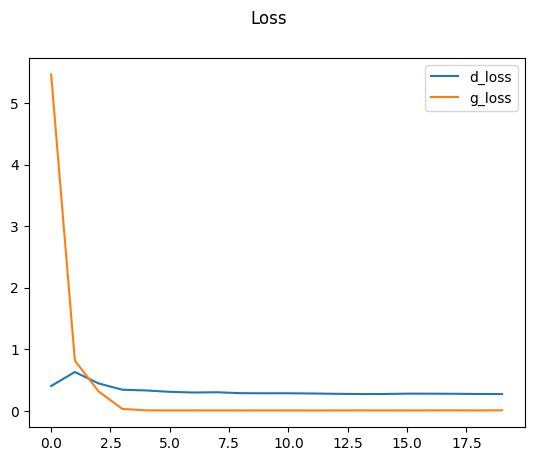

In [90]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label = 'd_loss')
plt.plot(hist.history['g_loss'], label = 'g_loss')
plt.legend()
plt.show()

In [97]:
imgs = generator.predict(tf.random.normal((16,128,1)))

1/1 [==============================] - 0s 19ms/step


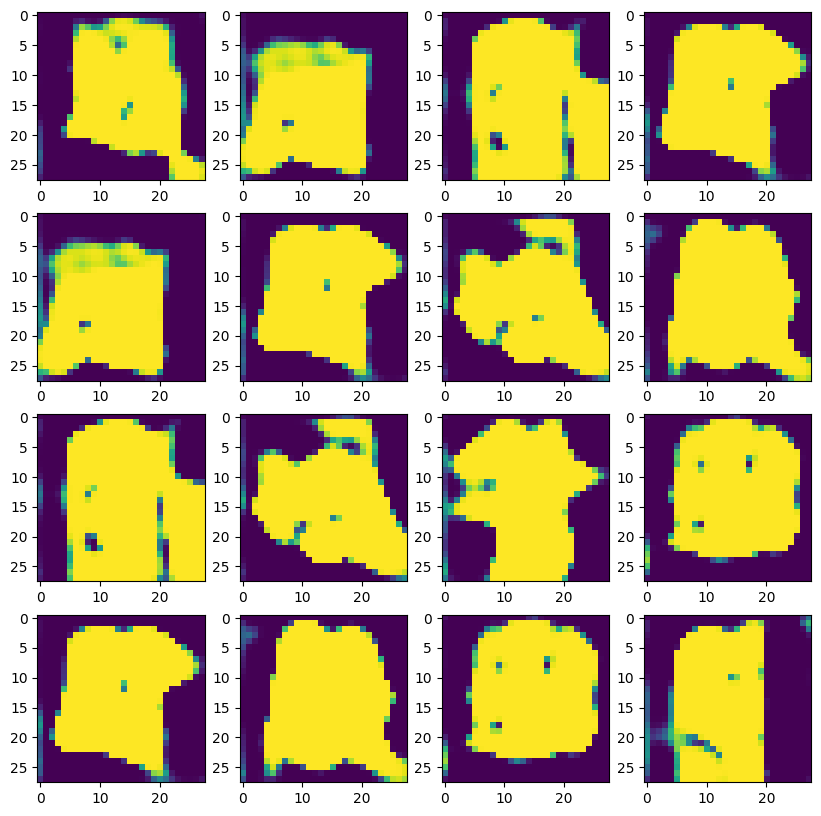

In [98]:
fig, ax = plt.subplots(ncols = 4, nrows = 4, figsize = (10,10))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1]) 

In [93]:
generator.save('fgan_generator.h5')
discriminator.save('fgan_discriminator.h5')

/Users/berling/new_project/.venv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
